# Importing Libraries 

In [404]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
pd.set_option("display.max_columns",300)
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [405]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\successful_educations.csv")

# Project
## Analysis of Successful People & Their Background

# Data Info

In [406]:
df.head()

,Name,Profession,Degree,Field,Institution,Graduation Year,Country,University Global Ranking,GPA (or Equivalent),Scholarship/Award
0,Elon Musk,Entrepreneur,Bachelor of Science,Physics & Economics,University of Pennsylvania,1997,USA,13,3.7,Dean’s List
1,Bill Gates,Entrepreneur,Dropped Out,computer science,Harvard University,1975,USA,5,NaN,Dean’s List
2,Sundar Pichai,Tech Executive,Master of Science,Material Sciences and Engineering,Stanford University,1995,USA,3,3.8,Fellowship in Engineering
3,Sheryl Sandberg,Tech Executive,Master of Business Administration,Business Administration,Harvard Business School,1995,USA,2,3.9,Hoover Fellowship
4,Jeff Bezos,Entrepreneur,Bachelor of Science,Computer Science and Electrical Engineering,Princeton University,1986,USA,16,3.6,Marquis Scholar


In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Name                       125 non-null    object
 1   Profession                 125 non-null    object
 2   Degree                     118 non-null    object
 3   Field                      117 non-null    object
 4   Institution                117 non-null    object
 5   Graduation Year            111 non-null    object
 6   Country                    124 non-null    object
 7   University Global Ranking  81 non-null     object
 8   GPA (or Equivalent)        86 non-null     object
 9   Scholarship/Award          88 non-null     object
dtypes: object(10)
memory usage: 9.9+ KB


In [408]:
df.columns

Index(['Name', 'Profession', 'Degree', 'Field', 'Institution',
       'Graduation Year', 'Country', 'University Global Ranking',
       'GPA (or Equivalent)', 'Scholarship/Award'],
      dtype='object')

In [409]:
df.shape

(125, 10)

# Data Handling & Cleaning

In [410]:
df.isna().sum()
for col in df.columns:
    mode_val = df[col].mode(dropna=True)[0]  # Get most frequent value
    df[col].fillna(mode_val, inplace=True)

df.duplicated().sum()

np.int64(0)

In [411]:
df["Graduation Year"] = pd.to_numeric(df["Graduation Year"], errors='coerce').astype("Int64")
df["GPA (or Equivalent)"] = pd.to_numeric(df["GPA (or Equivalent)"], errors="coerce")
df["University Global Ranking"] = pd.to_numeric(df["University Global Ranking"], errors="coerce")  # Converting Data Type 

# EDA & Visualization 

In [412]:
df.head()

,Name,Profession,Degree,Field,Institution,Graduation Year,Country,University Global Ranking,GPA (or Equivalent),Scholarship/Award
0,Elon Musk,Entrepreneur,Bachelor of Science,Physics & Economics,University of Pennsylvania,1997,USA,13.0,3.7,Dean’s List
1,Bill Gates,Entrepreneur,Dropped Out,computer science,Harvard University,1975,USA,5.0,3.8,Dean’s List
2,Sundar Pichai,Tech Executive,Master of Science,Material Sciences and Engineering,Stanford University,1995,USA,3.0,3.8,Fellowship in Engineering
3,Sheryl Sandberg,Tech Executive,Master of Business Administration,Business Administration,Harvard Business School,1995,USA,2.0,3.9,Hoover Fellowship
4,Jeff Bezos,Entrepreneur,Bachelor of Science,Computer Science and Electrical Engineering,Princeton University,1986,USA,16.0,3.6,Marquis Scholar


In [413]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Name                       125 non-null    object 
 1   Profession                 125 non-null    object 
 2   Degree                     125 non-null    object 
 3   Field                      125 non-null    object 
 4   Institution                125 non-null    object 
 5   Graduation Year            124 non-null    Int64  
 6   Country                    125 non-null    object 
 7   University Global Ranking  123 non-null    float64
 8   GPA (or Equivalent)        124 non-null    float64
 9   Scholarship/Award          125 non-null    object 
dtypes: Int64(1), float64(2), object(7)
memory usage: 10.0+ KB


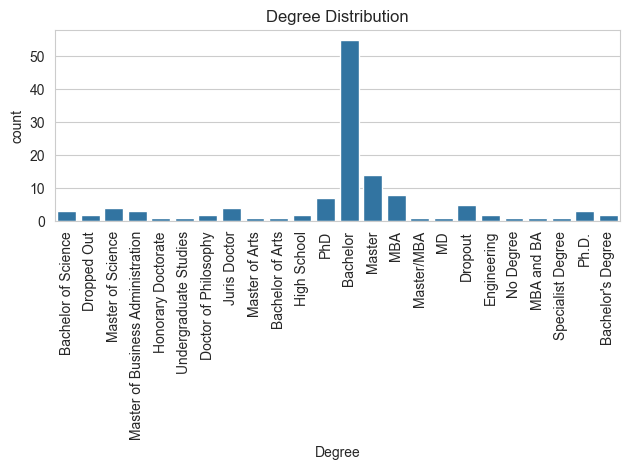

In [414]:
sns.countplot(x='Degree', data=df)
plt.title("Degree Distribution")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


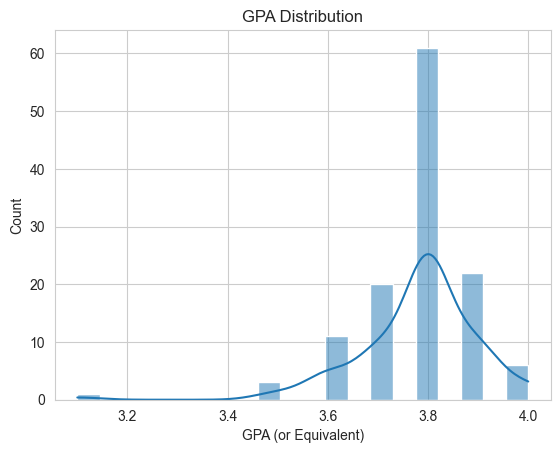

In [415]:
sns.histplot(df['GPA (or Equivalent)'], kde=True, bins=20)
plt.title("GPA Distribution")
plt.show()


In [416]:
df.head()

,Name,Profession,Degree,Field,Institution,Graduation Year,Country,University Global Ranking,GPA (or Equivalent),Scholarship/Award
0,Elon Musk,Entrepreneur,Bachelor of Science,Physics & Economics,University of Pennsylvania,1997,USA,13.0,3.7,Dean’s List
1,Bill Gates,Entrepreneur,Dropped Out,computer science,Harvard University,1975,USA,5.0,3.8,Dean’s List
2,Sundar Pichai,Tech Executive,Master of Science,Material Sciences and Engineering,Stanford University,1995,USA,3.0,3.8,Fellowship in Engineering
3,Sheryl Sandberg,Tech Executive,Master of Business Administration,Business Administration,Harvard Business School,1995,USA,2.0,3.9,Hoover Fellowship
4,Jeff Bezos,Entrepreneur,Bachelor of Science,Computer Science and Electrical Engineering,Princeton University,1986,USA,16.0,3.6,Marquis Scholar


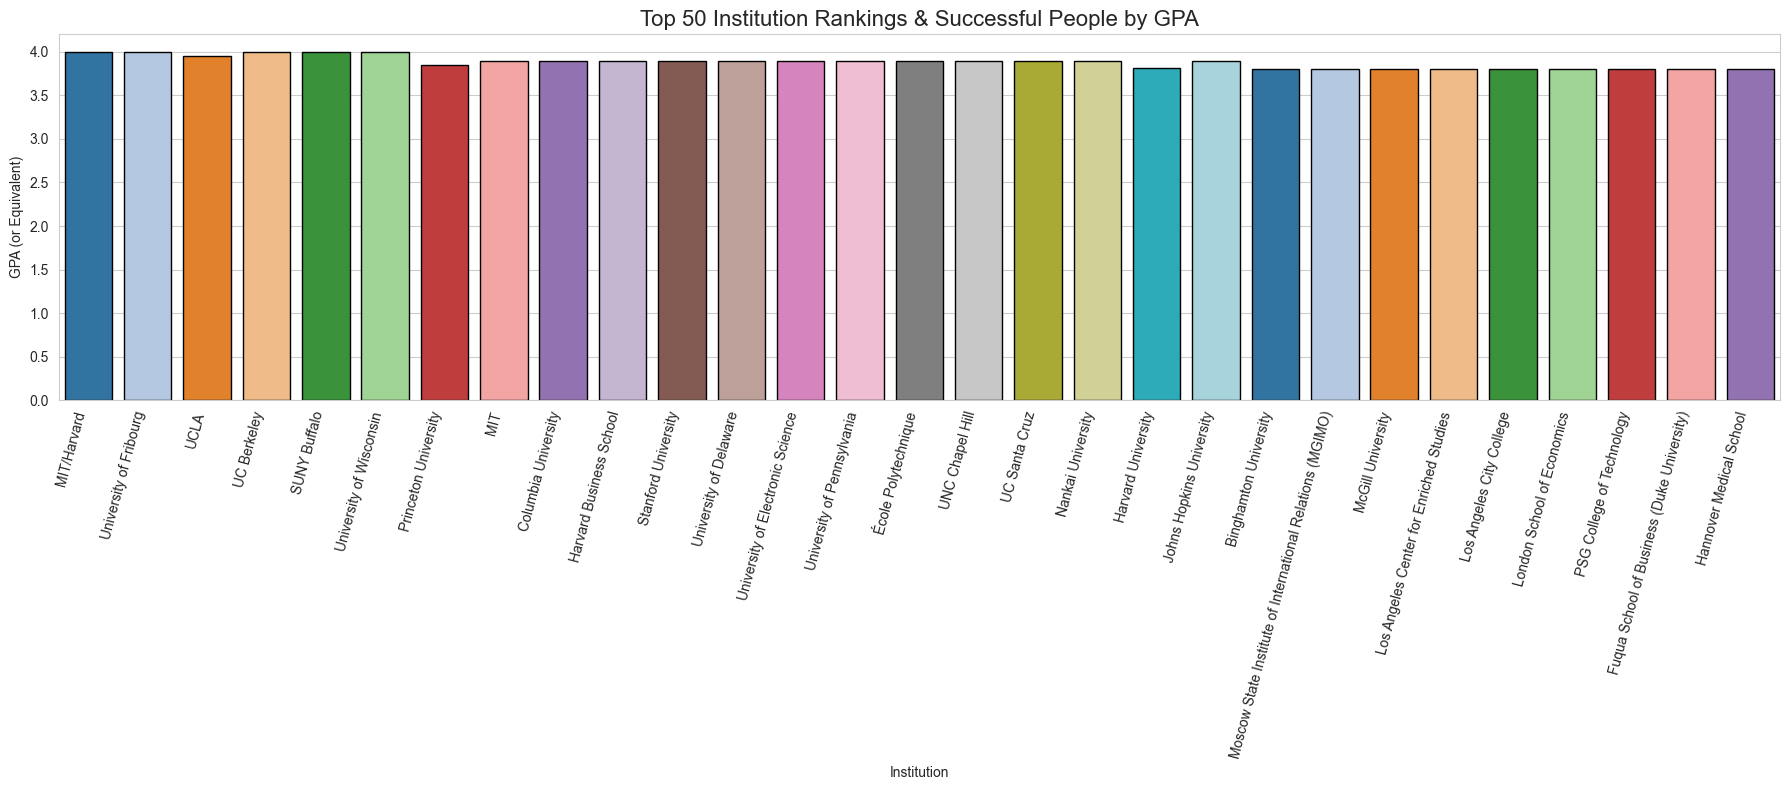

In [417]:
global_ranking=df.groupby(["Institution","Name"])["GPA (or Equivalent)"].sum().sort_values(ascending=False).reset_index().head(50)
global_ranking
plt.figure(figsize=(18,8))
sns.set_style('whitegrid')
sns.barplot(
    data=global_ranking,  # Show top 30 for readability
    x="Institution",
    y="GPA (or Equivalent)",
    edgecolor="black",
    ci=None,
    palette="tab20"
)
plt.title("Top 50 Institution Rankings & Successful People by GPA", size=16)
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()

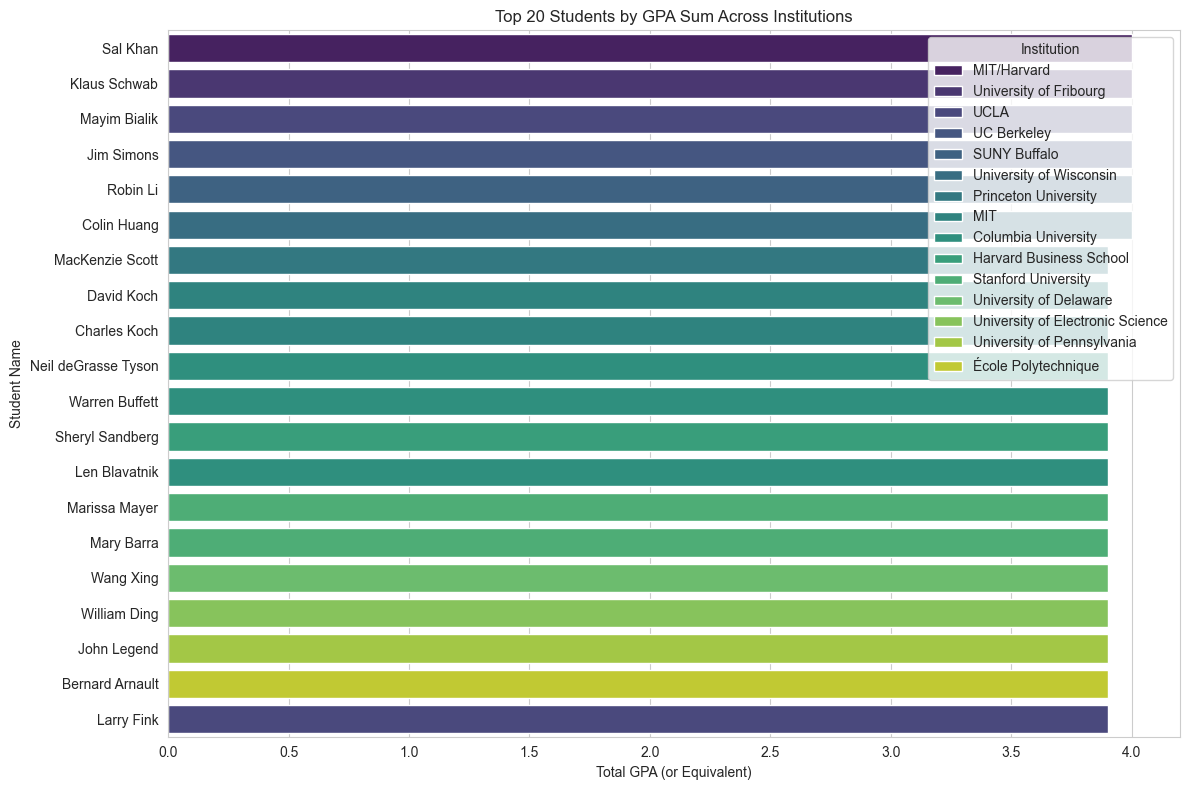

In [418]:
top20 = global_ranking.head(20)

plt.figure(figsize=(12,8))
sns.barplot(
    x="GPA (or Equivalent)", 
    y="Name", 
    data=top20,
    hue="Institution",
    dodge=False,
    palette="viridis"
)
plt.title("Top 20 Students by GPA Sum Across Institutions")
plt.xlabel("Total GPA (or Equivalent)")
plt.ylabel("Student Name")
plt.legend(title="Institution")
plt.tight_layout()
plt.show()


In [419]:

import plotly.express as px

fig = px.scatter(df, x='University Global Ranking', y='GPA (or Equivalent)',
                 color='Degree', hover_data=['Name', 'Institution', 'Field'],
                 title='GPA vs University Ranking (Interactive)')
fig.show()


In [420]:
fig = px.sunburst(df, path=['Country', 'Institution', 'Degree'], values='GPA (or Equivalent)',
                  title='Academic Breakdown by Country, Institution, and Degree')
fig.show()


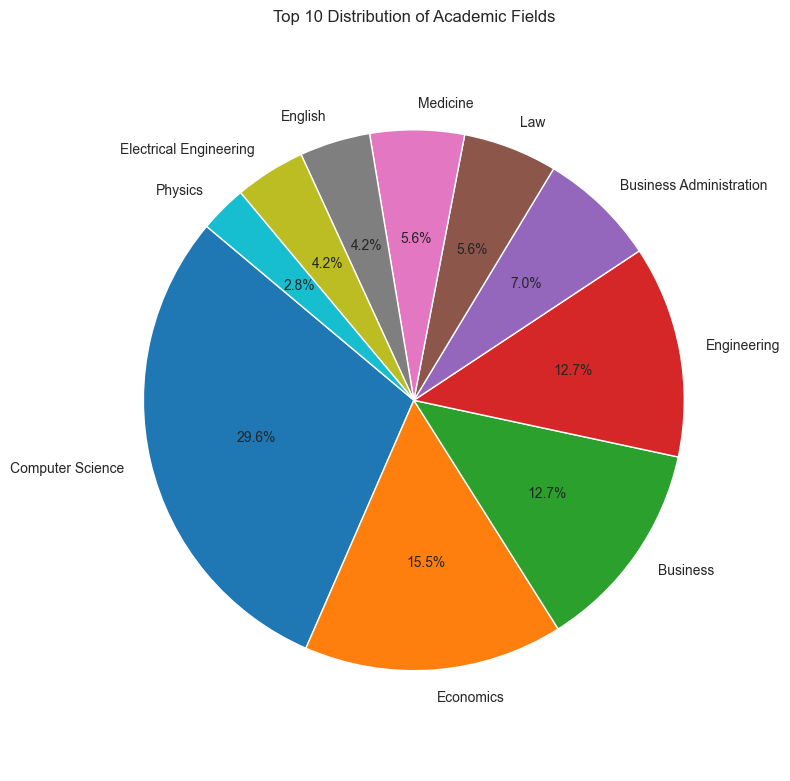

In [421]:
import matplotlib.pyplot as plt

# Count frequency of each field
field_counts = df['Field'].value_counts().head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(field_counts, labels=field_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Distribution of Academic Fields")
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


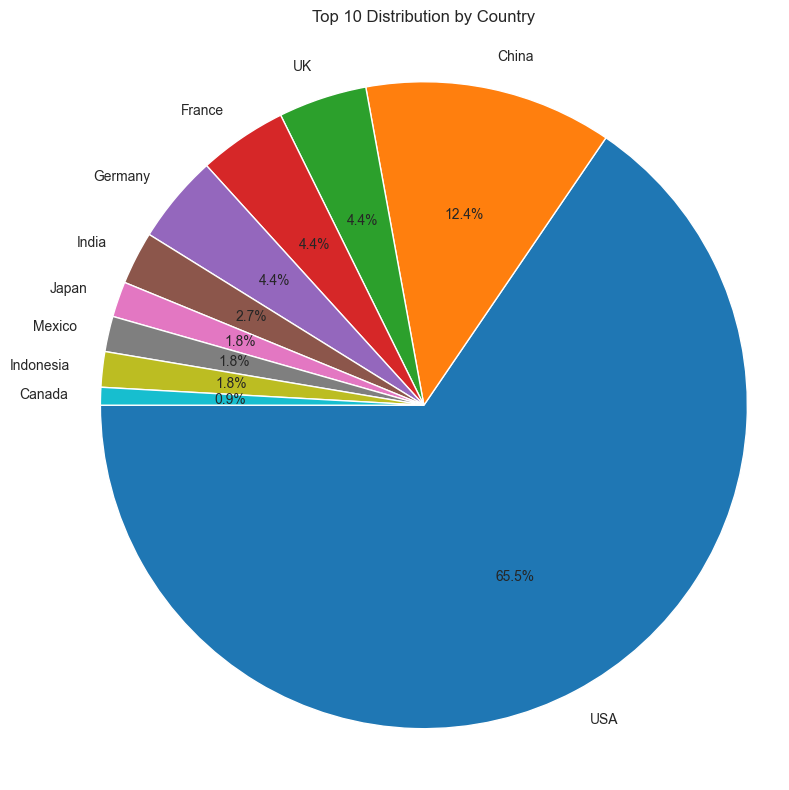

In [422]:
import matplotlib.pyplot as plt

# Count frequency of each country
country_counts = df['Country'].value_counts().head(10)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=180)
plt.title("Top 10 Distribution by Country")
plt.axis('equal')  # Ensures pie is a circle
plt.tight_layout()
plt.show()


# Machine Learning

In [423]:
df.head()

,Name,Profession,Degree,Field,Institution,Graduation Year,Country,University Global Ranking,GPA (or Equivalent),Scholarship/Award
0,Elon Musk,Entrepreneur,Bachelor of Science,Physics & Economics,University of Pennsylvania,1997,USA,13.0,3.7,Dean’s List
1,Bill Gates,Entrepreneur,Dropped Out,computer science,Harvard University,1975,USA,5.0,3.8,Dean’s List
2,Sundar Pichai,Tech Executive,Master of Science,Material Sciences and Engineering,Stanford University,1995,USA,3.0,3.8,Fellowship in Engineering
3,Sheryl Sandberg,Tech Executive,Master of Business Administration,Business Administration,Harvard Business School,1995,USA,2.0,3.9,Hoover Fellowship
4,Jeff Bezos,Entrepreneur,Bachelor of Science,Computer Science and Electrical Engineering,Princeton University,1986,USA,16.0,3.6,Marquis Scholar


In [424]:
df.columns

Index(['Name', 'Profession', 'Degree', 'Field', 'Institution',
       'Graduation Year', 'Country', 'University Global Ranking',
       'GPA (or Equivalent)', 'Scholarship/Award'],
      dtype='object')

In [425]:
# example list of columns to one-hot encode
cols = ['Profession', 'Degree', 'Field', 'Institution', 'Country', 'Scholarship/Award']

# assuming your dataframe is called df
df_encoded = pd.get_dummies(df, columns=cols, prefix=cols, drop_first=False)

# check the new shape and columns
print(df_encoded.shape)
df_encoded.head()


(125, 287)


,Name,Graduation Year,University Global Ranking,GPA (or Equivalent),Profession_Activist,Profession_Actor,Profession_Actor/Comedian,Profession_Actor/Podcaster,Profession_Actor/Scientist,Profession_Actor/Singer,Profession_Actor/Writer,Profession_Astrophysicist,Profession_Athlete,Profession_Author,Profession_Author/Philanthropist,Profession_Business,Profession_Business Executive,Profession_Business Leader,Profession_Businessman (Co-owner of Chanel),Profession_Businessman and Software Engineer,Profession_Comedian,Profession_Comedian/Actor,Profession_Education Executive,Profession_Engineer and Businessman,Profession_Entrepreneur,Profession_Fashion,Profession_Film Director,Profession_Finance,Profession_Investor,Profession_Journalist,Profession_Lawyer/Author,Profession_Media Executive,Profession_Musician,Profession_Nonprofit Executive,Profession_Philanthropist,Profession_Physicist,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_TV Host/Author,Profession_TV Host/Designer,Profession_Tech CEO,Profession_Tech Executive,Degree_Bachelor,Degree_Bachelor of Arts,Degree_Bachelor of Science,Degree_Bachelor's Degree,Degree_Doctor of Philosophy,Degree_Dropout,Degree_Dropped Out,Degree_Engineering,Degree_High School,Degree_Honorary Doctorate,Degree_Juris Doctor,Degree_MBA,Degree_MBA and BA,Degree_MD,Degree_Master,Degree_Master of Arts,Degree_Master of Business Administration,Degree_Master of Science,Degree_Master/MBA,Degree_No Degree,Degree_Ph.D.,Degree_PhD,Degree_Specialist Degree,Degree_Undergraduate Studies,Field_Animal Science,Field_Anthropology,Field_Astrophysics,Field_Biology,Field_Business,Field_Business Administration,Field_Commerce,Field_Computer Engineering,Field_Computer Science,Field_Computer Science and Economics,Field_Computer Science and Electrical Engineering,Field_Computer Science/Philosophy,Field_Creative Writing,Field_Drama,Field_Economics,Field_Economics and Management,Field_Electrical Engineering,Field_Electrical Engineering and Computer Science,Field_Engineering,Field_Engineering/Business,Field_English,Field_English Literature,Field_English/African American Studies,Field_Experimental Film,Field_Fashion Management,Field_Financier,Field_French/Classics,Field_General,Field_International Economic Relations,Field_Law,Field_Liberal Arts,Field_Management,Field_Maritime Law,Field_Material Sciences and Engineering,Field_Mathematics,Field_Mathematics & Economics,Field_Medicine,Field_Music,Field_Neuroscience,Field_Pharmacy,Field_Philosophy,Field_Physical Chemistry,Field_Physics,Field_Physics & Economics,Field_Playwriting,Field_Political Science,Field_Psychology,Field_Sociology,Field_Software Engineer,Field_Software Engineering,Field_Television & Radio,Field_Theatre Arts,Field_computer science,Field_computer science and psychology,Field_mechanical engineering,Field_speech communications and performing arts,Institution_Al-Azhar University,Institution_Azarbayjan State Oil Academy,Institution_Binghamton University,Institution_Brown University,Institution_Bryn Mawr College,Institution_Cambridge University,Institution_China Agricultural University,Institution_Clark University,Institution_Columbia University,Institution_Dartmouth College,Institution_Doncaster College,Institution_Duke University,Institution_Fachhochschule Salzburg,Institution_Fuqua School of Business (Duke University),Institution_Grinnell College,Institution_Gujarat University,Institution_Hangzhou Normal University,Institution_Hannover Medical School,Institution_Harvard Business School,Institution_Harvard Law School,Institution_Harvard University,Institution_Ithaca College,Institution_Johns Hopkins University,Institution_London School of Economics,Institution_Los Angeles Center for Enriched Studies,Institution_Los Angeles City College,Institution_MIT,Institution_MIT/Harvard,Institution_McGill University,Institution_Moscow State Institute of International Relations (MGIMO),Institution_NYU Tisch,Institution_Nanjing University,Institution_Nankai Univ

In [426]:
# convert all boolean columns to int
bool_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [427]:
df_encoded

,Name,Graduation Year,University Global Ranking,GPA (or Equivalent),Profession_Activist,Profession_Actor,Profession_Actor/Comedian,Profession_Actor/Podcaster,Profession_Actor/Scientist,Profession_Actor/Singer,Profession_Actor/Writer,Profession_Astrophysicist,Profession_Athlete,Profession_Author,Profession_Author/Philanthropist,Profession_Business,Profession_Business Executive,Profession_Business Leader,Profession_Businessman (Co-owner of Chanel),Profession_Businessman and Software Engineer,Profession_Comedian,Profession_Comedian/Actor,Profession_Education Executive,Profession_Engineer and Businessman,Profession_Entrepreneur,Profession_Fashion,Profession_Film Director,Profession_Finance,Profession_Investor,Profession_Journalist,Profession_Lawyer/Author,Profession_Media Executive,Profession_Musician,Profession_Nonprofit Executive,Profession_Philanthropist,Profession_Physicist,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_TV Host/Author,Profession_TV Host/Designer,Profession_Tech CEO,Profession_Tech Executive,Degree_Bachelor,Degree_Bachelor of Arts,Degree_Bachelor of Science,Degree_Bachelor's Degree,Degree_Doctor of Philosophy,Degree_Dropout,Degree_Dropped Out,Degree_Engineering,Degree_High School,Degree_Honorary Doctorate,Degree_Juris Doctor,Degree_MBA,Degree_MBA and BA,Degree_MD,Degree_Master,Degree_Master of Arts,Degree_Master of Business Administration,Degree_Master of Science,Degree_Master/MBA,Degree_No Degree,Degree_Ph.D.,Degree_PhD,Degree_Specialist Degree,Degree_Undergraduate Studies,Field_Animal Science,Field_Anthropology,Field_Astrophysics,Field_Biology,Field_Business,Field_Business Administration,Field_Commerce,Field_Computer Engineering,Field_Computer Science,Field_Computer Science and Economics,Field_Computer Science and Electrical Engineering,Field_Computer Science/Philosophy,Field_Creative Writing,Field_Drama,Field_Economics,Field_Economics and Management,Field_Electrical Engineering,Field_Electrical Engineering and Computer Science,Field_Engineering,Field_Engineering/Business,Field_English,Field_English Literature,Field_English/African American Studies,Field_Experimental Film,Field_Fashion Management,Field_Financier,Field_French/Classics,Field_General,Field_International Economic Relations,Field_Law,Field_Liberal Arts,Field_Management,Field_Maritime Law,Field_Material Sciences and Engineering,Field_Mathematics,Field_Mathematics & Economics,Field_Medicine,Field_Music,Field_Neuroscience,Field_Pharmacy,Field_Philosophy,Field_Physical Chemistry,Field_Physics,Field_Physics & Economics,Field_Playwriting,Field_Political Science,Field_Psychology,Field_Sociology,Field_Software Engineer,Field_Software Engineering,Field_Television & Radio,Field_Theatre Arts,Field_computer science,Field_computer science and psychology,Field_mechanical engineering,Field_speech communications and performing arts,Institution_Al-Azhar University,Institution_Azarbayjan State Oil Academy,Institution_Binghamton University,Institution_Brown University,Institution_Bryn Mawr College,Institution_Cambridge University,Institution_China Agricultural University,Institution_Clark University,Institution_Columbia University,Institution_Dartmouth College,Institution_Doncaster College,Institution_Duke University,Institution_Fachhochschule Salzburg,Institution_Fuqua School of Business (Duke University),Institution_Grinnell College,Institution_Gujarat University,Institution_Hangzhou Normal University,Institution_Hannover Medical School,Institution_Harvard Business School,Institution_Harvard Law School,Institution_Harvard University,Institution_Ithaca College,Institution_Johns Hopkins University,Institution_London School of Economics,Institution_Los Angeles Center for Enriched Studies,Institution_Los Angeles City College,Institution_MIT,Institution_MIT/Harvard,Institution_McGill University,Institution_Moscow State Institute of International Relations (MGIMO),Institution_NYU Tisch,Institution_Nanjing University,Institution_Nankai Univ

In [428]:
df_encoded.isna().sum()
df_encoded.dropna(inplace=True)
df_encoded.shape

(121, 287)

In [429]:
X = df_encoded.drop(columns=['Name'])

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit KMeans
model_kmeans = KMeans(n_clusters=3, random_state=42)
clusters = model_kmeans.fit_predict(X_scaled)

# Add cluster labels back to your DataFrame
df_encoded['Cluster'] = clusters

In [430]:
df_encoded.groupby("Cluster").mean(numeric_only=True)


,Graduation Year,University Global Ranking,GPA (or Equivalent),Profession_Activist,Profession_Actor,Profession_Actor/Comedian,Profession_Actor/Podcaster,Profession_Actor/Scientist,Profession_Actor/Singer,Profession_Actor/Writer,Profession_Astrophysicist,Profession_Athlete,Profession_Author,Profession_Author/Philanthropist,Profession_Business,Profession_Business Executive,Profession_Business Leader,Profession_Businessman (Co-owner of Chanel),Profession_Businessman and Software Engineer,Profession_Comedian,Profession_Comedian/Actor,Profession_Education Executive,Profession_Engineer and Businessman,Profession_Entrepreneur,Profession_Fashion,Profession_Film Director,Profession_Finance,Profession_Investor,Profession_Journalist,Profession_Lawyer/Author,Profession_Media Executive,Profession_Musician,Profession_Nonprofit Executive,Profession_Philanthropist,Profession_Physicist,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_TV Host/Author,Profession_TV Host/Designer,Profession_Tech CEO,Profession_Tech Executive,Degree_Bachelor,Degree_Bachelor of Arts,Degree_Bachelor of Science,Degree_Bachelor's Degree,Degree_Doctor of Philosophy,Degree_Dropout,Degree_Dropped Out,Degree_Engineering,Degree_High School,Degree_Honorary Doctorate,Degree_Juris Doctor,Degree_MBA,Degree_MBA and BA,Degree_MD,Degree_Master,Degree_Master of Arts,Degree_Master of Business Administration,Degree_Master of Science,Degree_Master/MBA,Degree_No Degree,Degree_Ph.D.,Degree_PhD,Degree_Specialist Degree,Degree_Undergraduate Studies,Field_Animal Science,Field_Anthropology,Field_Astrophysics,Field_Biology,Field_Business,Field_Business Administration,Field_Commerce,Field_Computer Engineering,Field_Computer Science,Field_Computer Science and Economics,Field_Computer Science and Electrical Engineering,Field_Computer Science/Philosophy,Field_Creative Writing,Field_Drama,Field_Economics,Field_Economics and Management,Field_Electrical Engineering,Field_Electrical Engineering and Computer Science,Field_Engineering,Field_Engineering/Business,Field_English,Field_English Literature,Field_English/African American Studies,Field_Experimental Film,Field_Fashion Management,Field_Financier,Field_French/Classics,Field_General,Field_International Economic Relations,Field_Law,Field_Liberal Arts,Field_Management,Field_Maritime Law,Field_Material Sciences and Engineering,Field_Mathematics,Field_Mathematics & Economics,Field_Medicine,Field_Music,Field_Neuroscience,Field_Pharmacy,Field_Philosophy,Field_Physical Chemistry,Field_Physics,Field_Physics & Economics,Field_Playwriting,Field_Political Science,Field_Psychology,Field_Sociology,Field_Software Engineer,Field_Software Engineering,Field_Television & Radio,Field_Theatre Arts,Field_computer science,Field_computer science and psychology,Field_mechanical engineering,Field_speech communications and performing arts,Institution_Al-Azhar University,Institution_Azarbayjan State Oil Academy,Institution_Binghamton University,Institution_Brown University,Institution_Bryn Mawr College,Institution_Cambridge University,Institution_China Agricultural University,Institution_Clark University,Institution_Columbia University,Institution_Dartmouth College,Institution_Doncaster College,Institution_Duke University,Institution_Fachhochschule Salzburg,Institution_Fuqua School of Business (Duke University),Institution_Grinnell College,Institution_Gujarat University,Institution_Hangzhou Normal University,Institution_Hannover Medical School,Institution_Harvard Business School,Institution_Harvard Law School,Institution_Harvard University,Institution_Ithaca College,Institution_Johns Hopkins University,Institution_London School of Economics,Institution_Los Angeles Center for Enriched Studies,Institution_Los Angeles City College,Institution_MIT,Institution_MIT/Harvard,Institution_McGill University,Institution_Moscow State Institute of International Relations (MGIMO),Institution_NYU Tisch,Institution_Nanjing University,Institution_Nankai Universit

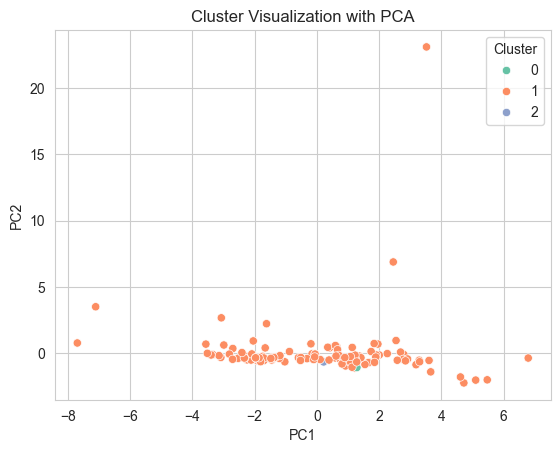

In [432]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df_plot = pd.DataFrame(components, columns=['PC1', 'PC2'])
df_plot['Cluster'] = clusters
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_plot, palette='Set2')
plt.title("Cluster Visualization with PCA")
plt.show()


In [434]:
fig=px.scatter(df_plot,x="PC1",y="PC2",color="Cluster")
fig.show()